# Load Data and Imports

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import math
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('Classification.csv')

# Goal

Create a model to determine churn based on different client details.

# Taking a Quick Look at Data

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Taking a look at the formats and non-null items
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
# We should convert MonthlyCharges and TotalCharges from object to number because some models only work with numerical data

In [5]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
#df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])
#df.info()

In [6]:
# It seems we have some problem with TotalCharges
# ValueError: Unable to parse string " " at position 488
df[df['TotalCharges']==' ']
# There are many options of what we should do with these uncorehent values. I will drop them as we have plenty of data for our model
# Also, the client's tenure = 0. It may be another error or the clients just subscribed our services, what is not very helpful for our analysis. They are the only clients with tenure = 0. This should be further analysed as we can be having problems in acquiring new data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df=df[df['TotalCharges']!=' ']

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

# Transforming Data

In [10]:
#Standardizing columns names in upper case
df.columns=df.columns.str.upper()

In [11]:
#Let's make the CHURN variable as a numerical variable
df['NUMCHURN']=df['CHURN'].map({'Yes':1,'No':0})
df['NUMCHURN']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: NUMCHURN, Length: 7032, dtype: int64

# Data Visualization

In [12]:
#let's check if all customerid are unique
df['CUSTOMERID'].duplicated().value_counts()

False    7032
Name: CUSTOMERID, dtype: int64

In [13]:
df['CHURN'].value_counts()

No     5163
Yes    1869
Name: CHURN, dtype: int64

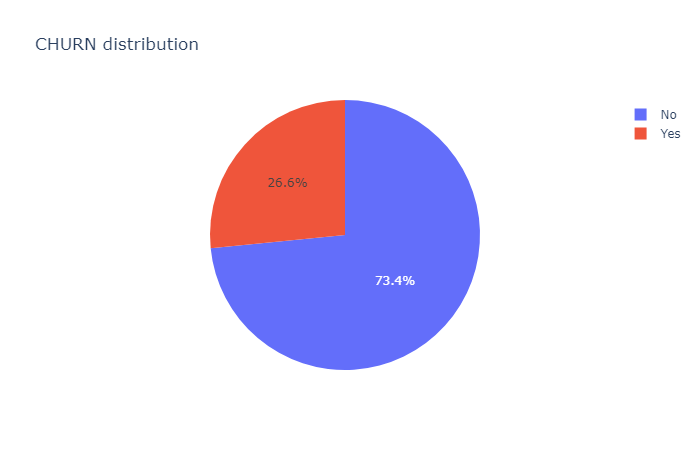

In [14]:
data4 = dict(type='pie', 
            labels=df['CHURN'].unique(),
            values=df['CHURN'].value_counts()
           )

layout4b = dict(title=dict(text='CHURN distribution'))
fig4a=go.Figure(data=data4, layout=layout4b)
fig4a.show(renderer='png')


#Few things we can do to minimize the influence of imbalanced dataset:
#- resample data (imbalanced-learn),
#- collect more samples,
#- use precision and recall as accuracy metrics.

In [15]:
#now, we're going to evaluate the content of all columns, to see if there's some weird value
df['GENDER'].value_counts()

Male      3549
Female    3483
Name: GENDER, dtype: int64

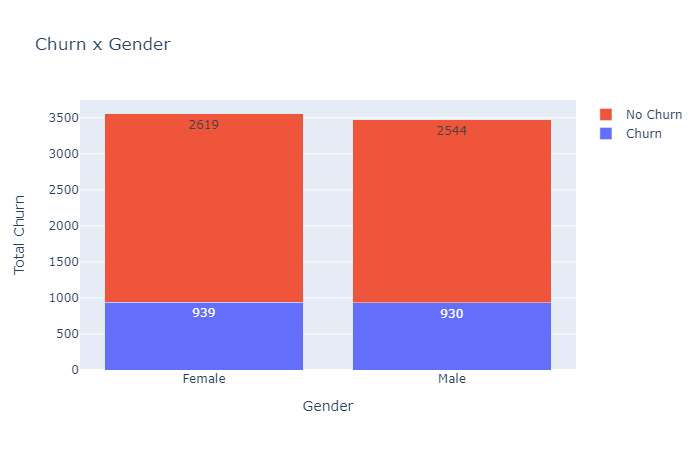

In [16]:
# Our clients are well balanced between genres. How genre relates to churn?
data1a = dict(type='bar',
         x=df['GENDER'],
         y=df[df['CHURN']=='Yes']['GENDER'].value_counts(),
         name='Churn',
              text=df[df['CHURN']=='Yes']['GENDER'].value_counts(),
            textposition='auto'
        )

data1b = dict(type='bar',
         x=df['GENDER'],
         y=df[df['CHURN']=='No']['GENDER'].value_counts(),
         name='No Churn',
              text=df[df['CHURN']=='No']['GENDER'].value_counts(),
            textposition='auto')

data1=[data1a,data1b]

layout1= dict(title=dict(text='Churn x Gender'),
                 yaxis=dict(title='Total Churn'),
                 xaxis=dict(title='Gender'),
                barmode='stack'
                )

fig1=go.Figure(data=data1, layout=layout1)
fig1.show(renderer='png')

In [17]:
#The gender seens to not have much influence in churn

In [18]:
df['SENIORCITIZEN'].value_counts()

0    5890
1    1142
Name: SENIORCITIZEN, dtype: int64

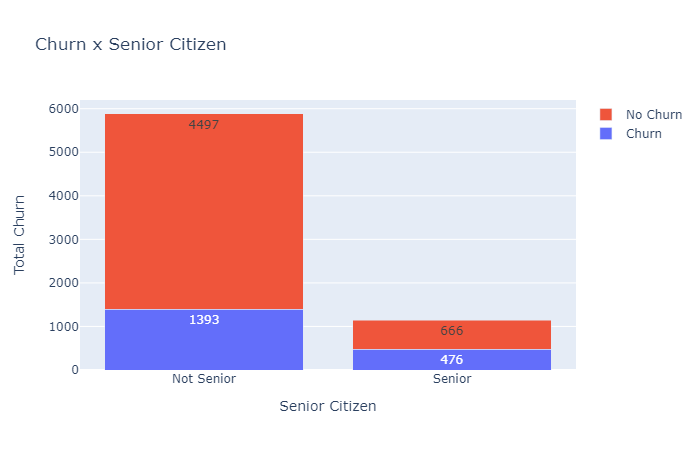

In [19]:
# Considering 0 is non senior citizens, we have more than 80% non senior clients
data2a = dict(type='bar',
         x=df['SENIORCITIZEN'].map({1:'Senior',0:'Not Senior'}).unique(),
         y=df[df['CHURN']=='Yes']['SENIORCITIZEN'].value_counts(),
         name='Churn',
         text=df[df['CHURN']=='Yes']['SENIORCITIZEN'].value_counts(),
            textposition='auto',
                    )

data2b = dict(type='bar',
         x=df['SENIORCITIZEN'].map({1:'Senior',0:'Not Senior'}).unique(),
         y=df[df['CHURN']=='No']['SENIORCITIZEN'].value_counts(),
         name='No Churn',
              text=df[df['CHURN']=='No']['SENIORCITIZEN'].value_counts(),
            textposition='auto',
               )

data2=[data2a, data2b]

layout2= dict(title=dict(text='Churn x Senior Citizen'),
                 yaxis=dict(title='Total Churn'),
                 xaxis=dict(title='Senior Citizen'),
                barmode='stack',          
                               )

fig2=go.Figure(data=data2, layout=layout2)
fig2.show(renderer='png')

In [20]:
# It might be interesting to take a closer look in Senior citizen's churn (+- 40% churn)

In [21]:
df['PARTNER'].value_counts()

No     3639
Yes    3393
Name: PARTNER, dtype: int64

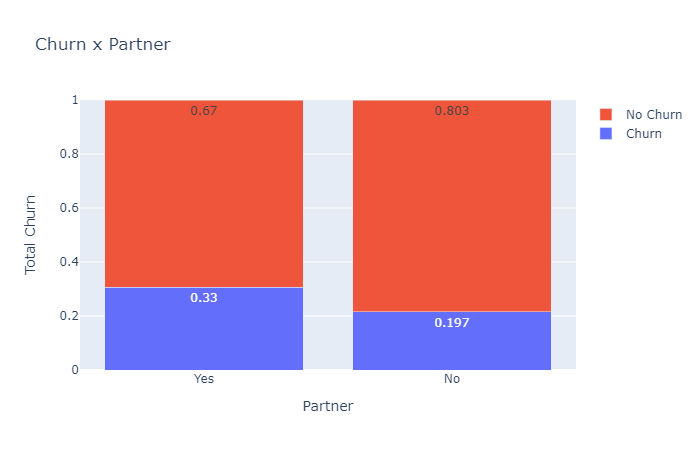

In [22]:
# Most of our customers have partners but it also seems that we have a balanced sample
data3a = dict(type='bar',
         x=df['PARTNER'],
         y=df[df['CHURN']=='Yes']['PARTNER'].value_counts(),
         name='Churn',
         text=round(df[df['CHURN']=='Yes']['PARTNER'].value_counts()/df['PARTNER'].value_counts(),3),
            textposition='auto',
                    )

data3b = dict(type='bar',
         x=df['PARTNER'],
         y=df[df['CHURN']=='No']['PARTNER'].value_counts(),
         name='No Churn',
              text=round(df[df['CHURN']=='No']['PARTNER'].value_counts()/df['PARTNER'].value_counts(),3),
            textposition='auto',
               )

data3=[data3a, data3b]

layout3= dict(title=dict(text='Churn x Partner'),
                 yaxis=dict(title='Total Churn'),
                 xaxis=dict(title='Partner'),
                barmode='stack',
               barnorm='fraction'
                )

fig3=go.Figure(data=data3, layout=layout3)
fig3.show(renderer='png')

In [23]:
# People with partner have the tendency to churn more often

In [24]:
df['DEPENDENTS'].value_counts()

No     4933
Yes    2099
Name: DEPENDENTS, dtype: int64

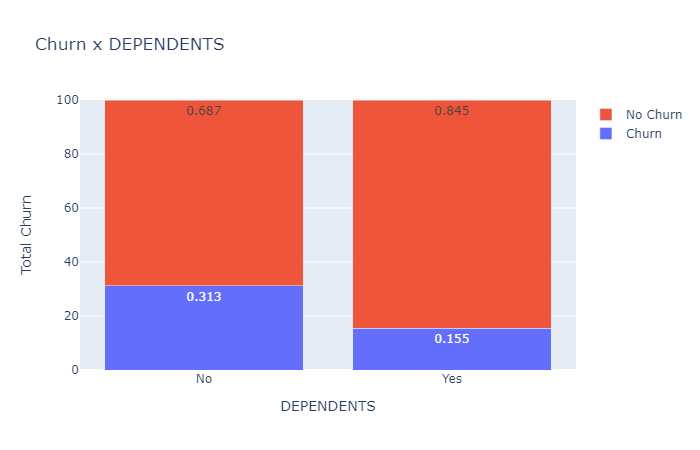

In [25]:
#70% of our customers do not have dependents
data5a = dict(type='bar',
         x=df['DEPENDENTS'].unique(),
         y=df[df['CHURN']=='Yes']['DEPENDENTS'].value_counts(),
         name='Churn',
         text=round(df[df['CHURN']=='Yes']['DEPENDENTS'].value_counts()/df['DEPENDENTS'].value_counts(),3),
            textposition='auto',
                    )

data5b = dict(type='bar',
         x=df['DEPENDENTS'].unique(),
         y=df[df['CHURN']=='No']['DEPENDENTS'].value_counts(),
         name='No Churn',
              text=round(df[df['CHURN']=='No']['DEPENDENTS'].value_counts()/df['DEPENDENTS'].value_counts(),3),
            textposition='auto'
               )

data5=[data5a, data5b]

layout5= dict(title=dict(text='Churn x DEPENDENTS'),
                 yaxis=dict(title='Total Churn'),
                 xaxis=dict(title='DEPENDENTS'),
                barmode='stack',
               barnorm='percent'
                )

fig5=go.Figure(data=data5, layout=layout5)
fig5.show(renderer='png')

In [26]:
#70% of our customers do not have dependents and among them, almost 32% churn. We have less clients with dependens but they churn less. This variable is probably relevant.

In [27]:
df['TENURE'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: TENURE, Length: 72, dtype: int64

In [28]:
#We have many different tenure values
df['TENURE'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

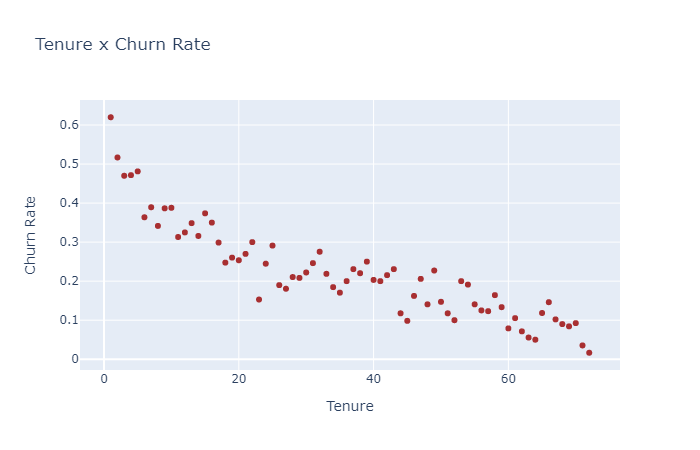

In [29]:
tenuredf=df.groupby('TENURE').NUMCHURN.mean().reset_index()

data6a = dict(type='scatter',
           x=tenuredf['TENURE'],
           y=tenuredf['NUMCHURN'],
           mode='markers',
           name='Low',
           marker_color='rgba(152, 0, 0, .8)'
        )

layout6a = dict(title=dict(text='Tenure x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='Tenure'))

fig6a=go.Figure(data=data6a, layout=layout6a)
fig6a.show(renderer='png')

In [30]:
# The visualization allows to infer that Churn and Tenure are inverse proportional.
# The higher the tenure (time with the product), less chance to churn.
# Newer clients churn more.

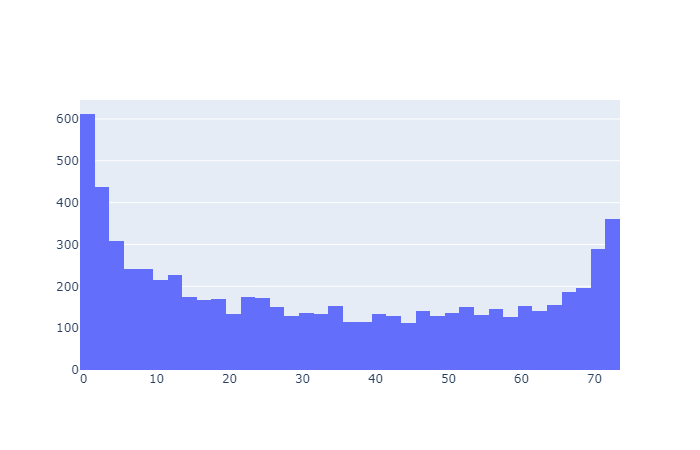

In [31]:
data6 = [go.Histogram(x=df['TENURE'])]
fig6=go.Figure(data=data6)
fig6.show(renderer='png')

In [32]:
#By evaluating the histogram, we see that most of costumers are on the edges. As we want to make the clients stay longer so they churn less, we should pay attention on this.

In [33]:
df['PHONESERVICE'].value_counts()

Yes    6352
No      680
Name: PHONESERVICE, dtype: int64

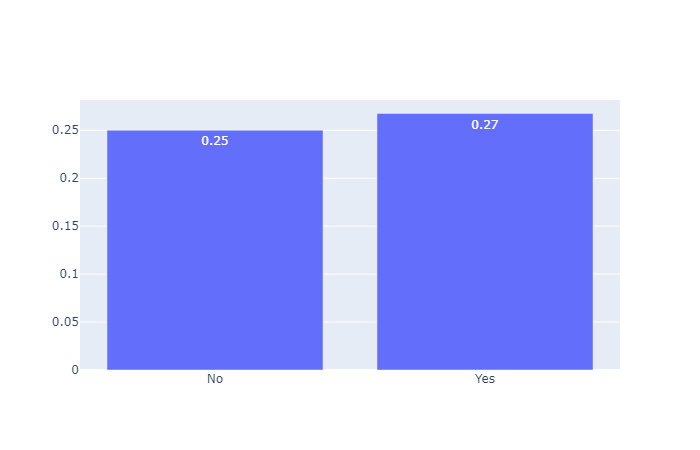

In [34]:
dfphone = df.groupby('PHONESERVICE').NUMCHURN.mean().reset_index()
data7a = dict(type='bar',
             x=dfphone['PHONESERVICE'],
             y=dfphone['NUMCHURN'],
             text=round(dfphone['NUMCHURN'],2),
             textposition='auto')

layout7 = dict(title=dict(text='Phone Service x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='Phone Service'))


fig7=go.Figure(data=data7a)
fig7.show(renderer='png')

In [35]:
# 90% of our costumers have phone services but the churn rate is similar to both clients with or without phone service.

In [36]:
df['INTERNETSERVICE'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: INTERNETSERVICE, dtype: int64

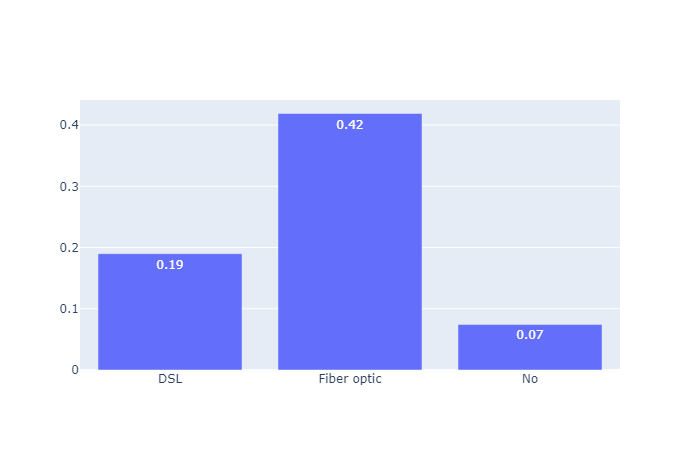

In [37]:
dfinternet = df.groupby('INTERNETSERVICE').NUMCHURN.mean().reset_index()
data7a = dict(type='bar',
             x=dfinternet['INTERNETSERVICE'],
             y=dfinternet['NUMCHURN'],
             text=round(dfinternet['NUMCHURN'],2),
             textposition='auto')

layout7 = dict(title=dict(text='INTERNETSERVICE x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='INTERNETSERVICE'))


fig7=go.Figure(data=data7a)
fig7.show(renderer='png')

In [38]:
# Almost 80% of our clients have Internet Services (DSL or Fiber)
# The Fiber optic clients are in higher number and are also more than 40% of chrun!!

In [39]:
df['MULTIPLELINES'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MULTIPLELINES, dtype: int64

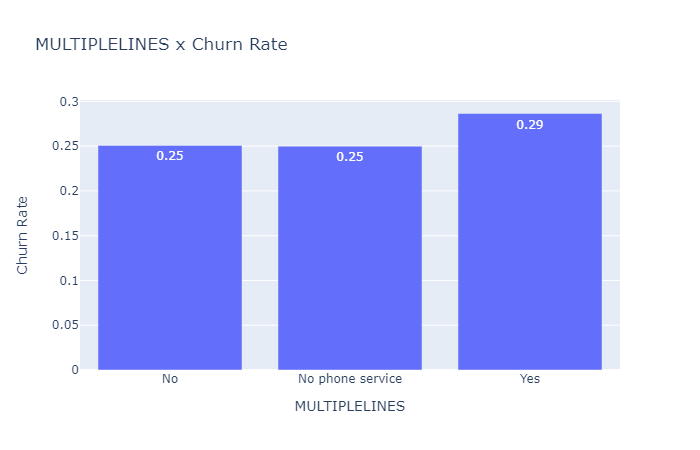

In [40]:
dflines = df.groupby('MULTIPLELINES').NUMCHURN.mean().reset_index()
data8a = dict(type='bar',
             x=dflines['MULTIPLELINES'],
             y=dflines['NUMCHURN'],
             text=round(dflines['NUMCHURN'],2),
             textposition='auto')

layout8 = dict(title=dict(text='MULTIPLELINES x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='MULTIPLELINES'))


fig8=go.Figure(data=data8a,layout=layout8)
fig8.show(renderer='png')

In [41]:
# The churn rate is very similar to clients with or without multiple lines. 

In [42]:
df['ONLINESECURITY'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: ONLINESECURITY, dtype: int64

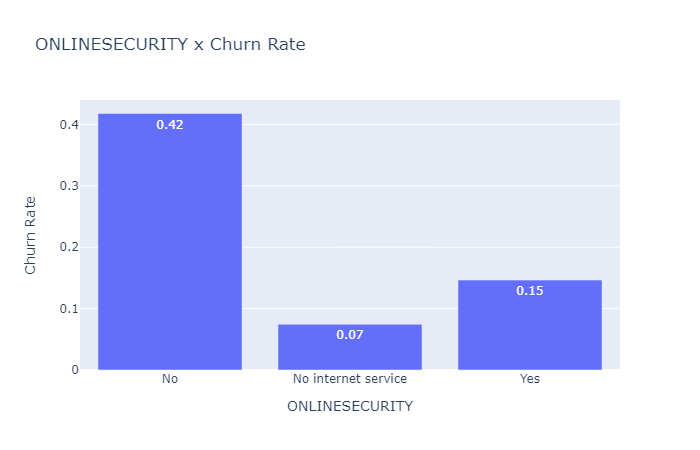

In [43]:
dfsecurity = df.groupby('ONLINESECURITY').NUMCHURN.mean().reset_index()
data9a = dict(type='bar',
             x=dfsecurity['ONLINESECURITY'],
             y=dfsecurity['NUMCHURN'],
             text=round(dfsecurity['NUMCHURN'],2),
             textposition='auto')

layout9 = dict(title=dict(text='ONLINESECURITY x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='ONLINESECURITY'))


fig9=go.Figure(data=data9a,layout=layout9)
fig9.show(renderer='png')

In [44]:
df['ONLINEBACKUP'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: ONLINEBACKUP, dtype: int64

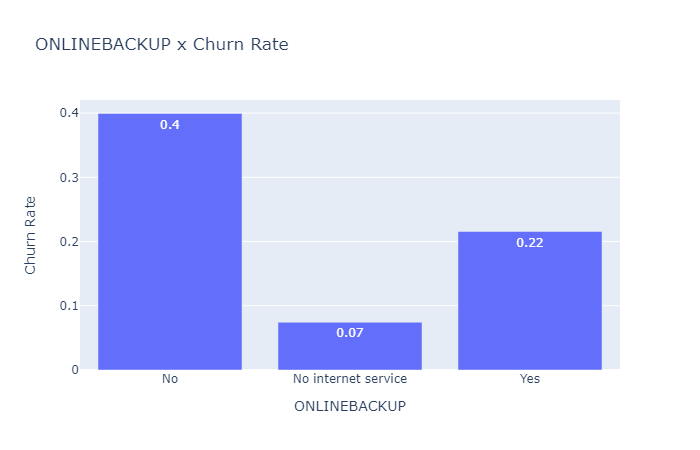

In [45]:
dfbkp = df.groupby('ONLINEBACKUP').NUMCHURN.mean().reset_index()
data10a = dict(type='bar',
             x=dfbkp['ONLINEBACKUP'],
             y=dfbkp['NUMCHURN'],
             text=round(dfbkp['NUMCHURN'],2),
             textposition='auto')

layout10 = dict(title=dict(text='ONLINEBACKUP x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='ONLINEBACKUP'))


fig10=go.Figure(data=data10a,layout=layout10)
fig10.show(renderer='png')

In [46]:
df['DEVICEPROTECTION'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DEVICEPROTECTION, dtype: int64

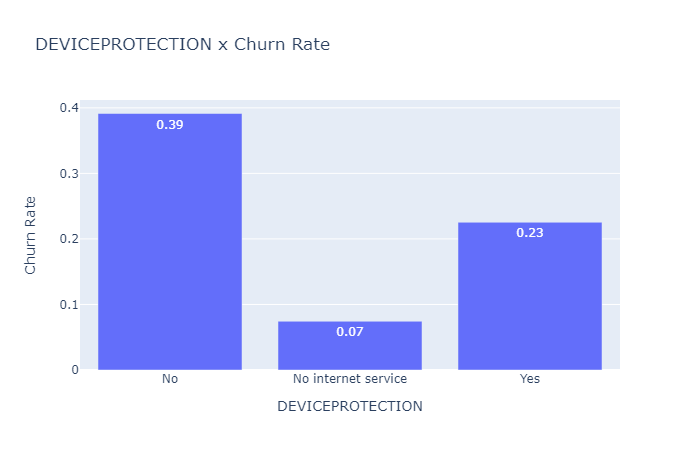

In [47]:
dfprotection = df.groupby('DEVICEPROTECTION').NUMCHURN.mean().reset_index()
data11a = dict(type='bar',
             x=dfprotection['DEVICEPROTECTION'],
             y=dfprotection['NUMCHURN'],
             text=round(dfprotection['NUMCHURN'],2),
             textposition='auto')

layout11 = dict(title=dict(text='DEVICEPROTECTION x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='DEVICEPROTECTION'))


fig11=go.Figure(data=data11a,layout=layout11)
fig11.show(renderer='png')

In [48]:
df['TECHSUPPORT'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TECHSUPPORT, dtype: int64

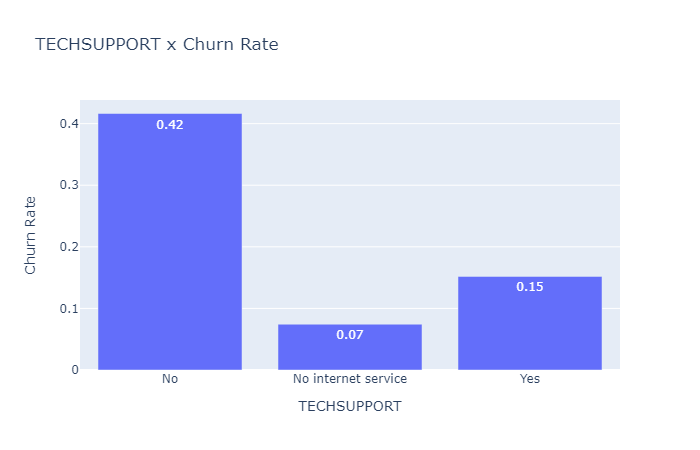

In [49]:
dftech = df.groupby('TECHSUPPORT').NUMCHURN.mean().reset_index()
data12a = dict(type='bar',
             x=dftech['TECHSUPPORT'],
             y=dftech['NUMCHURN'],
             text=round(dftech['NUMCHURN'],2),
             textposition='auto')

layout12 = dict(title=dict(text='TECHSUPPORT x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='TECHSUPPORT'))


fig12=go.Figure(data=data12a,layout=layout12)
fig12.show(renderer='png')

In [50]:
# The churn rate for clients without technical support is of more than 40%!

In [51]:
df['STREAMINGTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: STREAMINGTV, dtype: int64

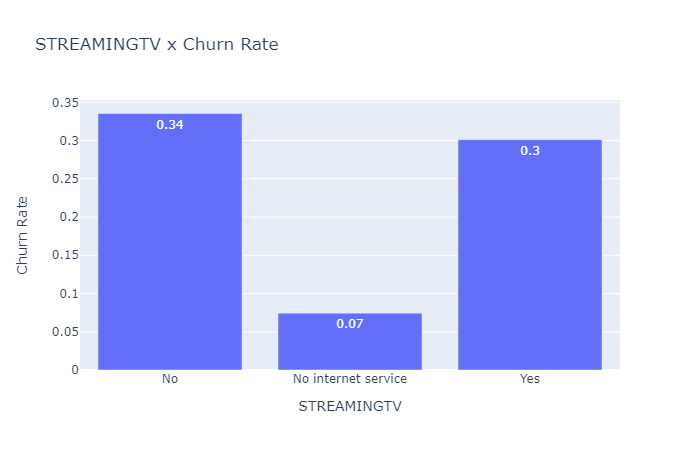

In [52]:
dftv = df.groupby('STREAMINGTV').NUMCHURN.mean().reset_index()
data13a = dict(type='bar',
             x=dftv['STREAMINGTV'],
             y=dftv['NUMCHURN'],
             text=round(dftv['NUMCHURN'],2),
             textposition='auto')

layout13 = dict(title=dict(text='STREAMINGTV x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='STREAMINGTV'))


fig13=go.Figure(data=data13a,layout=layout13)
fig13.show(renderer='png')

In [53]:
df['STREAMINGMOVIES'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: STREAMINGMOVIES, dtype: int64

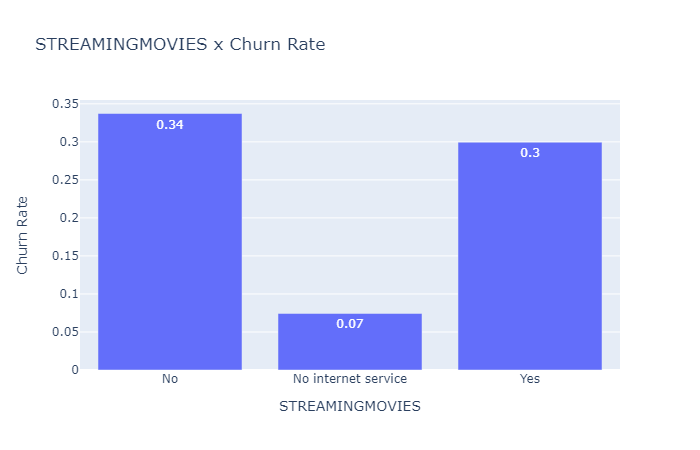

In [54]:
dfmovies = df.groupby('STREAMINGMOVIES').NUMCHURN.mean().reset_index()
data14a = dict(type='bar',
             x=dfmovies['STREAMINGMOVIES'],
             y=dfmovies['NUMCHURN'],
             text=round(dfmovies['NUMCHURN'],2),
             textposition='auto')

layout14 = dict(title=dict(text='STREAMINGMOVIES x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='STREAMINGMOVIES'))


fig14=go.Figure(data=data14a,layout=layout14)
fig14.show(renderer='png')

In [55]:
df['CONTRACT'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: CONTRACT, dtype: int64

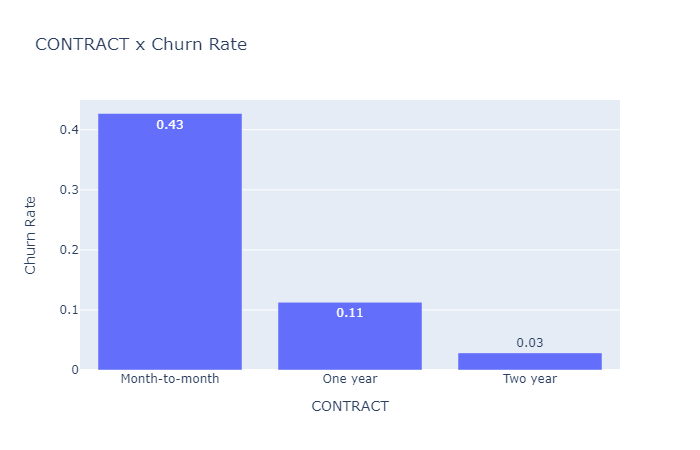

In [56]:
dfcontract = df.groupby('CONTRACT').NUMCHURN.mean().reset_index()
data15 = dict(type='bar',
             x=dfcontract['CONTRACT'],
             y=dfcontract['NUMCHURN'],
             text=round(dfcontract['NUMCHURN'],2),
             textposition='auto')

layout15 = dict(title=dict(text='CONTRACT x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='CONTRACT'))


fig15=go.Figure(data=data15,layout=layout15)
fig15.show(renderer='png')

In [57]:
df['PAPERLESSBILLING'].value_counts()

Yes    4168
No     2864
Name: PAPERLESSBILLING, dtype: int64

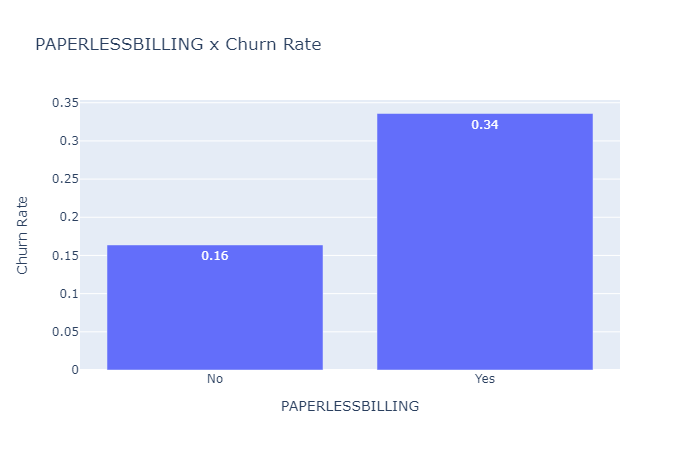

In [58]:
dfpaperless = df.groupby('PAPERLESSBILLING').NUMCHURN.mean().reset_index()
data16 = dict(type='bar',
             x=dfpaperless['PAPERLESSBILLING'],
             y=dfpaperless['NUMCHURN'],
             text=round(dfpaperless['NUMCHURN'],2),
             textposition='auto')

layout16 = dict(title=dict(text='PAPERLESSBILLING x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='PAPERLESSBILLING'))


fig16=go.Figure(data=data16,layout=layout16)
fig16.show(renderer='png')

In [59]:
df['PAYMENTMETHOD'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PAYMENTMETHOD, dtype: int64

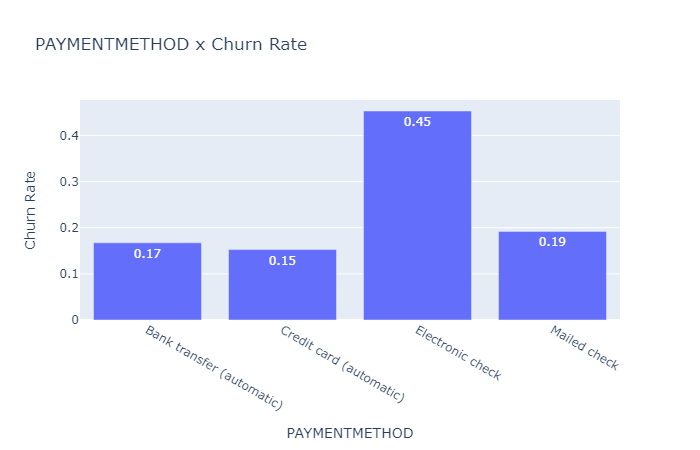

In [60]:
dfpayment = df.groupby('PAYMENTMETHOD').NUMCHURN.mean().reset_index()
data17 = dict(type='bar',
             x=dfpayment['PAYMENTMETHOD'],
             y=dfpayment['NUMCHURN'],
             text=round(dfpayment['NUMCHURN'],2),
             textposition='auto')

layout17 = dict(title=dict(text='PAYMENTMETHOD x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='PAYMENTMETHOD'))


fig17=go.Figure(data=data17,layout=layout17)
fig17.show(renderer='png')

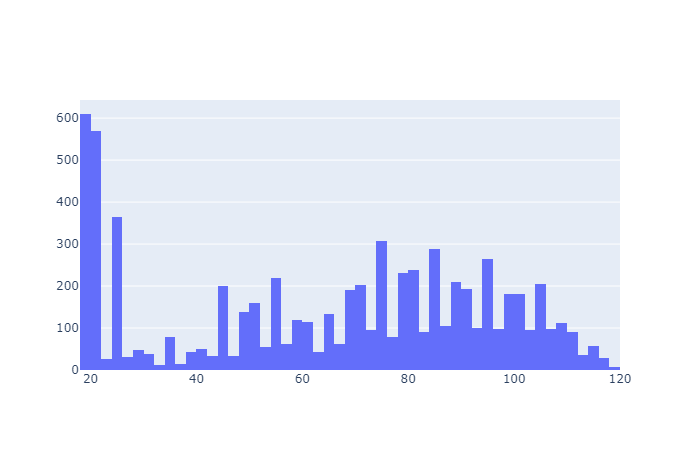

In [61]:
data13 = [go.Histogram(x=df['MONTHLYCHARGES'])]
fig13=go.Figure(data=data13)
fig13.show(renderer='png')

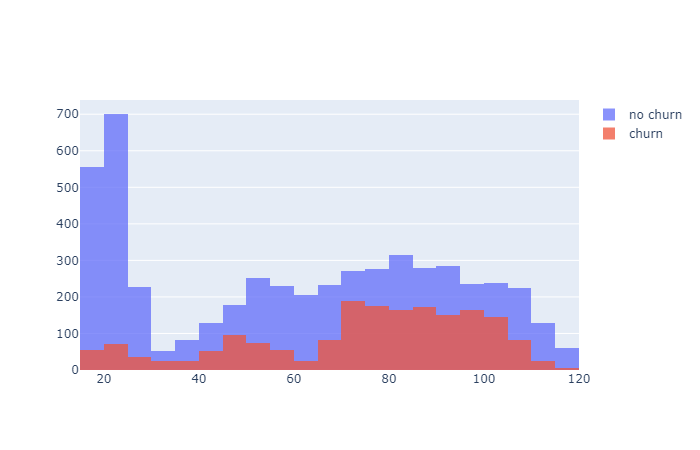

In [62]:
data14 = [go.Histogram(x=df[df['CHURN'] == "No"]['MONTHLYCHARGES'])]
data15 = [go.Histogram(x=df[df['CHURN'] == "Yes"]['MONTHLYCHARGES'])]
data16= [data14,data15]
fig14=go.Figure()
fig14.add_trace(go.Histogram(x=df[df['CHURN'] == "No"]['MONTHLYCHARGES'],name='no churn'))
fig14.add_trace(go.Histogram(x=df[df['CHURN'] == "Yes"]['MONTHLYCHARGES'],name='churn'))
fig14.update_layout(barmode='overlay')
fig14.update_traces(opacity=0.75)

fig14.show(renderer='png')


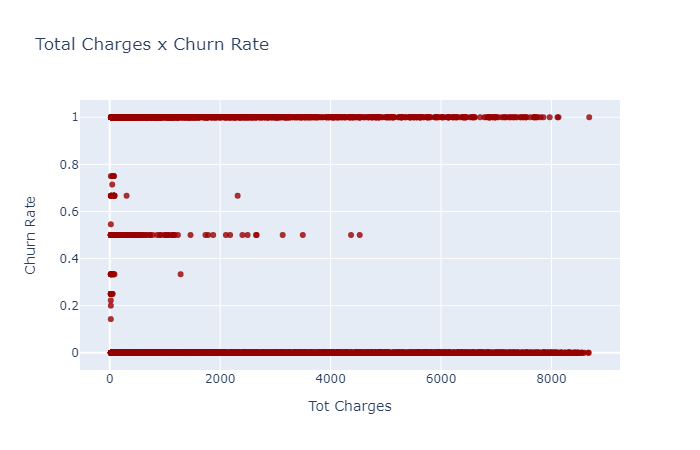

In [63]:
totchardf=df.groupby('TOTALCHARGES').NUMCHURN.mean().reset_index()

data14a = dict(type='scatter',
           x=totchardf['TOTALCHARGES'],
           y=totchardf['NUMCHURN'],
           mode='markers',
           name='Low',
           marker_color='rgba(152, 0, 0, .8)'
        )

layout14a = dict(title=dict(text='Total Charges x Churn Rate'),
                 yaxis=dict(title='Churn Rate'),
                 xaxis=dict(title='Tot Charges'))

fig14a=go.Figure(data=data14a, layout=layout14a)
fig14a.show(renderer='png')

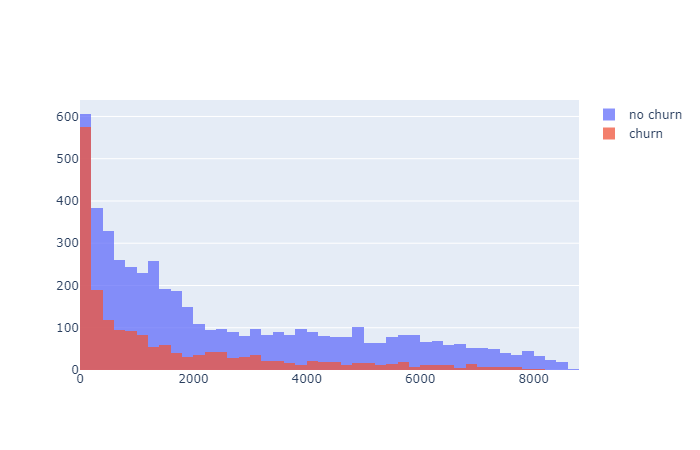

In [64]:
data14 = [go.Histogram(x=df[df['CHURN'] == "No"]['TOTALCHARGES'])]
data15 = [go.Histogram(x=df[df['CHURN'] == "Yes"]['TOTALCHARGES'])]
data16= [data14,data15]
fig14=go.Figure()
fig14.add_trace(go.Histogram(x=df[df['CHURN'] == "No"]['TOTALCHARGES'],name='no churn'))
fig14.add_trace(go.Histogram(x=df[df['CHURN'] == "Yes"]['TOTALCHARGES'],name='churn'))
fig14.update_layout(barmode='overlay')
fig14.update_traces(opacity=0.75)

fig14.show(renderer='png')


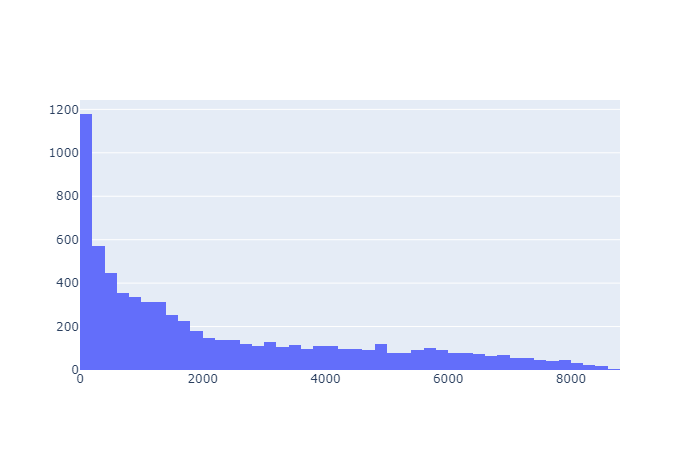

In [65]:
data14 = [go.Histogram(x=df['TOTALCHARGES'])]
fig14=go.Figure(data=data14)
fig14.show(renderer='png')

In [66]:
df.describe()

,SENIORCITIZEN,TENURE,MONTHLYCHARGES,TOTALCHARGES,NUMCHURN
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# Encoding

In [67]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#
#cat_features = ['GENDER','SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'MULTIPLELINES', 'INTERNETSERVICE','ONLINESECURITY', 
#                'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES', 
#                'PAPERLESSBILLING', 'PAYMENTMETHOD','PHONESERVICE', 'CONTRACT']
#X = pd.get_dummies(df, columns=cat_features, drop_first=True)
#, drop_first=True

In [68]:
X = pd.DataFrame()
X['NUMCHURN']=df['NUMCHURN']
X['CUSTOMERID']=df['CUSTOMERID']

In [69]:
X

,NUMCHURN,CUSTOMERID
0,0,7590-VHVEG
1,0,5575-GNVDE
2,1,3668-QPYBK
3,0,7795-CFOCW
4,1,9237-HQITU
...,...,...
7038,0,6840-RESVB
7039,0,2234-XADUH
7040,0,4801-JZAZL
7041,1,8361-LTMKD


In [70]:
import numpy as np

X['dummy_gender'] = np.where(df['GENDER'].isin(['Male']), 1, 0)
X['dummy_deviceprotection_no'] = np.where(df['DEVICEPROTECTION'].isin(['No']), 1, 0)
X['dummy_deviceprotection_yes'] = np.where(df['DEVICEPROTECTION'].isin(['Yes']), 1, 0)
X['dummy_partner'] = np.where(df['PARTNER'].isin(['Yes']), 1, 0)
X['dummy_seniorcitizen'] = np.where(df['SENIORCITIZEN'].isin([1]), 1, 0)
X['dummy_dependents'] = np.where(df['DEPENDENTS'].isin(['Yes']), 1, 0)
X['dummy_phoneservice'] = np.where(df['PHONESERVICE'].isin(['Yes']), 1, 0)
X['dummy_paperlessbilling'] = np.where(df['PAPERLESSBILLING'].isin(['Yes']), 1, 0)
X['dummy_streamingmovies_yes'] = np.where(df['STREAMINGMOVIES'].isin(['Yes']), 1, 0)
#X['dummy_streamingmovies_no'] = np.where(df['STREAMINGMOVIES'].isin(['No internet service']), 1, 0)
X['dummy_streamingtv_yes'] = np.where(df['STREAMINGTV'].isin(['Yes']), 1, 0)
#X['dummy_streamingtv_no'] = np.where(df['STREAMINGTV'].isin(['No internet service']), 1, 0)
X['dummy_paymentmethod'] = np.where(df['PAYMENTMETHOD'].isin(['Electronic check']), 1, 0)
X['dummy_multiplelines'] = np.where(df['MULTIPLELINES'].isin(['Yes']), 1, 0)
X['dummy_internetservice'] = np.where(df['INTERNETSERVICE'].isin(['Fiber optic']), 1, 0)
X['dummy_onlinesecurity'] = np.where(df['ONLINESECURITY'].isin(['No']), 1, 0)
X['dummy_contract'] = np.where(df['CONTRACT'].isin(['Month-to-month']), 1, 0)
X['dummy_techsupport'] = np.where(df['TECHSUPPORT'].isin(['No']), 1, 0)
X['dummy_onlinebackup'] = np.where(df['ONLINEBACKUP'].isin(['No']), 1, 0)

In [71]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
a = sc.fit_transform(df[['TENURE']])
b = sc.fit_transform(df[['MONTHLYCHARGES']])
c = sc.fit_transform(df[['TOTALCHARGES']])
X['TENURE'] = a
X['MONTHLYCHARGES'] = b
X['TOTALCHARGES'] = c

In [72]:
X.corr()

,NUMCHURN,dummy_gender,dummy_deviceprotection_no,dummy_deviceprotection_yes,dummy_partner,dummy_seniorcitizen,dummy_dependents,dummy_phoneservice,dummy_paperlessbilling,dummy_streamingmovies_yes,...,dummy_paymentmethod,dummy_multiplelines,dummy_internetservice,dummy_onlinesecurity,dummy_contract,dummy_techsupport,dummy_onlinebackup,TENURE,MONTHLYCHARGES,TOTALCHARGES
NUMCHURN,1.000000,-0.008545,0.252056,-0.066193,-0.149982,0.150541,-0.163128,0.011691,0.191454,0.060860,...,0.301455,0.040033,0.307463,0.342235,0.404565,0.336877,0.267595,-0.354049,0.192858,-0.199484
dummy_gender,-0.008545,1.000000,-0.003163,-0.000807,-0.001379,-0.001819,0.010349,-0.007515,-0.011902,-0.010105,...,0.000844,-0.008883,-0.011189,0.010859,-0.003251,0.003815,0.008605,0.005285,-0.013779,0.000048
dummy_deviceprotection_no,0.252056,-0.003163,1.000000,-0.641670,-0.146702,0.094403,-0.128053,-0.075421,0.166253,-0.037978,...,0.239173,-0.018242,0.217449,0.371496,0.396876,0.419653,0.361238,-0.314820,0.171057,-0.189485
dummy_deviceprotection_yes,-0.066193,-0.000807,-0.641670,1.000000,0.153556,0.059514,0.013900,-0.070076,0.104079,0.402309,...,-0.003308,0.201733,0.176356,0.064389,-0.225988,0.010856,0.025045,0.361520,0.482607,0.522881
dummy_partner,-0.149982,-0.001379,-0.146702,0.153556,1.000000,0.016957,0.452269,0.018397,-0.013957,0.118108,...,-0.083207,0.142561,0.001235,-0.129394,-0.280202,-0.108875,-0.135626,0.381912,0.097825,0.319072
dummy_seniorcitizen,0.150541,-0.001819,0.094403,0.059514,0.016957,1.000000,-0.210550,0.008392,0.156258,0.119842,...,0.171322,0.142996,0.254923,0.185145,0.137752,0.205254,0.087539,0.015683,0.219874,0.102411
dummy_dependents,-0.163128,0.010349,-0.128053,0.013900,0.452269,-0.210550,1.000000,-0.001078,-0.110131,-0.038375,...,-0.149274,-0.024307,-0.164101,-0.186979,-0.229715,-0.171164,-0.137421,0.163386,-0.112343,0.064653
dummy_phoneservice,0.011691,-0.007515,-0.075421,-0.070076,0.018397,0.008392,-0.001078,1.000000,0.016696,-0.033477,...,0.002747,0.279530,0.290183,-0.058546,-0.001243,-0.055102,-0.092579,0.007877,0.248033,0.113008
dummy_paperlessbilling,0.191454,-0.011902,0.166253,0.104079,-0.013957,0.156258,-0.110131,0.016696,1.000000,0.211583,...,0.208427,0.163746,0.326470,0.267592,0.168296,0.229875,0.144218,0.004823,0.351930,0.157830
dummy_streamingmovies_yes,0.060860,-0.010105,-0.037978,0.402309,0.118108,0.119842,-0.038375,-0.033477,0.211583,1.000000,...,0.137420,0.259194,0.322457,0.174999,-0.117867,0.090218,0.084142,0.285402,0.627235,0.519867


In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
NUMCHURN                      7032 non-null int64
CUSTOMERID                    7032 non-null object
dummy_gender                  7032 non-null int32
dummy_deviceprotection_no     7032 non-null int32
dummy_deviceprotection_yes    7032 non-null int32
dummy_partner                 7032 non-null int32
dummy_seniorcitizen           7032 non-null int32
dummy_dependents              7032 non-null int32
dummy_phoneservice            7032 non-null int32
dummy_paperlessbilling        7032 non-null int32
dummy_streamingmovies_yes     7032 non-null int32
dummy_streamingtv_yes         7032 non-null int32
dummy_paymentmethod           7032 non-null int32
dummy_multiplelines           7032 non-null int32
dummy_internetservice         7032 non-null int32
dummy_onlinesecurity          7032 non-null int32
dummy_contract                7032 non-null int32
dummy_techsupport             7032 non-nul

# Model 1


# SPLIT DATA

In [86]:
from sklearn.model_selection import train_test_split
X11 = X.drop(labels = ['NUMCHURN','CUSTOMERID'],axis = 1)
y11 = X['NUMCHURN']
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11, test_size=0.20)


# Model 1

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Optimization terminated successfully.
         Current function value: 0.415198
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               NUMCHURN   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5604
Method:                           MLE   Df Model:                           20
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.2820
Time:                        02:45:12   Log-Likelihood:                -2335.5
converged:                       True   LL-Null:                       -3252.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.3053      0.684     -3.372      0.001      

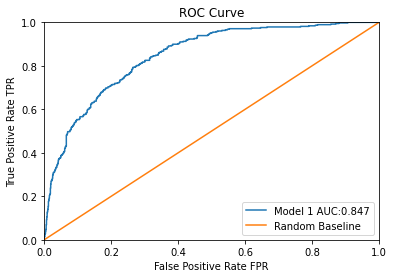

True positives (Actual = 1 and predicted = 1):  209
True negatives (Actual = 0 and predicted = 0):  929
False positives (Actual = 0 and predicted = 1):  100
False negatives (Actual = 1 and predicted = 0):  169
Accuracy (tp + tn)/(tp + tn + fn + fp):  0.8088130774697939
Precision tp/(tp + fp):  0.6763754045307443
Sensitivity tp/(tp + fn):  0.5529100529100529


In [87]:
X11_train = sm.add_constant(X11_train)
X11_test = sm.add_constant(X11_test)
model_2 = sm.Logit(y11_train, X11_train).fit()
print(model_2.summary())
pred_2 = model_2.predict(X11_test)

fpr_2, tpr_2, _ = roc_curve(y11_test, pred_2)
auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr_2, tpr_2)
plt.plot([0,1], [0,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Model 1 AUC:' + str(round(auc_2, 3)), 'Random Baseline'], loc='lower right')
plt.title('ROC Curve' )
plt.xlabel('False Positive Rate FPR' )
plt.ylabel('True Positive Rate TPR')
plt.show() 

pred = np.array(model_2.predict(X11_test) > 0.5, dtype=float)
actual = np.array(y11_test)

tp = np.sum(np.logical_and(actual==1, pred==1))
tn = np.sum(np.logical_and(actual==0, pred==0))
fp = np.sum(np.logical_and(actual==0, pred==1))
fn = np.sum(np.logical_and(actual==1, pred==0))

print("True positives (Actual = 1 and predicted = 1): ", tp)
print("True negatives (Actual = 0 and predicted = 0): ", tn)
print("False positives (Actual = 0 and predicted = 1): ", fp)
print("False negatives (Actual = 1 and predicted = 0): ", fn)

print("Accuracy (tp + tn)/(tp + tn + fn + fp): ", (tp + tn)/(tp + tn + fn + fp))
print("Precision tp/(tp + fp): ", tp/(tp + fp))
print("Sensitivity tp/(tp + fn): ", tp/(tp + fn))

# MODEL 1 refined

scores
[0.00000000e+00 7.39016208e-01 1.98537727e+02 1.95638829e+01
 6.68601272e+01 1.00820295e+02 1.07685436e+02 7.25421737e-02
 7.80139541e+01 1.18484655e+01 1.26015659e+01 3.44416378e+02
 3.89533380e+00 2.78750210e+02 3.42431008e+02 4.05032225e+02
 3.23761476e+02 2.07901724e+02 1.95005985e+02 3.62587690e+01
 6.30699199e+01]
P - Values
[1.00000000e+00 3.89976204e-01 4.35449921e-45 9.72911522e-06
 2.91471029e-16 1.00719043e-23 3.15008956e-25 7.87670713e-01
 1.02315208e-18 5.77088781e-04 3.85423715e-04 6.96754800e-77
 4.84204161e-02 1.40588296e-62 1.88558335e-76 4.42078430e-90
 2.19576050e-72 3.94149321e-47 2.56865219e-44 1.72780823e-09
 1.99497576e-15]


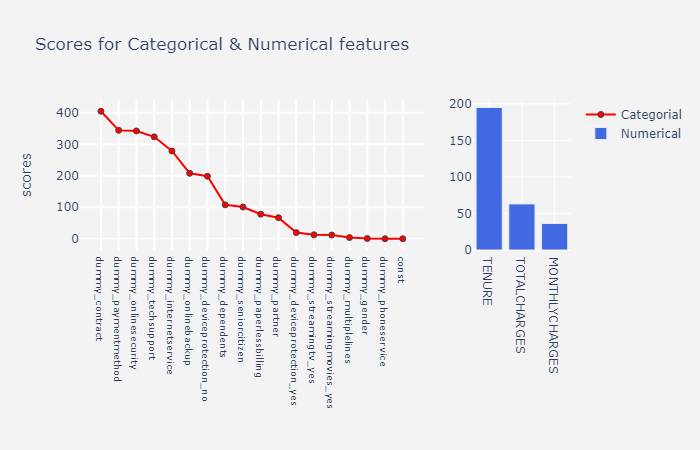

In [88]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(X11_train,y11_train)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":X11_train.columns,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)
num_cols=['TOTALCHARGES','TENURE','MONTHLYCHARGES']

#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
fig.show(renderer='png')

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Optimization terminated successfully.
         Current function value: 0.425927
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               NUMCHURN   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5614
Method:                           MLE   Df Model:                           10
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.2682
Time:                        02:45:19   Log-Likelihood:                -2395.8
converged:                       True   LL-Null:                       -3274.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.1655      0.132    -16.345      0.000      -2.

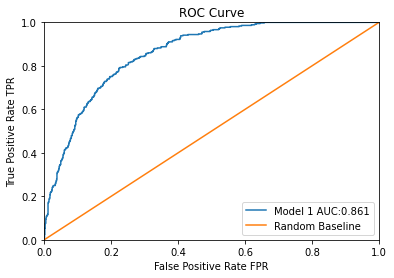

True positives (Actual = 1 and predicted = 1):  202
True negatives (Actual = 0 and predicted = 0):  943
False positives (Actual = 0 and predicted = 1):  107
False negatives (Actual = 1 and predicted = 0):  155
Accuracy (tp + tn)/(tp + tn + fn + fp):  0.8137882018479033
Precision tp/(tp + fp):  0.6537216828478964
Sensitivity tp/(tp + fn):  0.5658263305322129


In [90]:
X21 = X.drop(labels = ['NUMCHURN','CUSTOMERID','dummy_gender','dummy_deviceprotection_yes','dummy_deviceprotection_no',
                      'dummy_dependents','dummy_phoneservice','dummy_partner','dummy_onlinebackup','dummy_streamingtv_yes','dummy_multiplelines',
                       'MONTHLYCHARGES'],axis = 1)
y21 = X['NUMCHURN']
X21_train, X21_test, y21_train, y21_test = train_test_split(X21,y21, test_size=0.20)

X21_train = sm.add_constant(X21_train)
X21_test = sm.add_constant(X21_test)
model_2 = sm.Logit(y21_train, X21_train).fit()
print(model_2.summary())
pred_2 = model_2.predict(X21_test)

fpr_2, tpr_2, _ = roc_curve(y21_test, pred_2)
auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr_2, tpr_2)
plt.plot([0,1], [0,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Model 1 AUC:' + str(round(auc_2, 3)), 'Random Baseline'], loc='lower right')
plt.title('ROC Curve' )
plt.xlabel('False Positive Rate FPR' )
plt.ylabel('True Positive Rate TPR')
plt.show() 

pred = np.array(model_2.predict(X21_test) > 0.5, dtype=float)
actual = np.array(y21_test)

tp = np.sum(np.logical_and(actual==1, pred==1))
tn = np.sum(np.logical_and(actual==0, pred==0))
fp = np.sum(np.logical_and(actual==0, pred==1))
fn = np.sum(np.logical_and(actual==1, pred==0))

print("True positives (Actual = 1 and predicted = 1): ", tp)
print("True negatives (Actual = 0 and predicted = 0): ", tn)
print("False positives (Actual = 0 and predicted = 1): ", fp)
print("False negatives (Actual = 1 and predicted = 0): ", fn)

print("Accuracy (tp + tn)/(tp + tn + fn + fp): ", (tp + tn)/(tp + tn + fn + fp))
print("Precision tp/(tp + fp): ", tp/(tp + fp))
print("Sensitivity tp/(tp + fn): ", tp/(tp + fn))


# Model 2 - numerical variables

In [100]:
X[['MONTHLYCHARGES','TENURE','TOTALCHARGES']].corr()

,MONTHLYCHARGES,TENURE,TOTALCHARGES
MONTHLYCHARGES,1.000000,0.246862,0.651065
TENURE,0.246862,1.000000,0.825880
TOTALCHARGES,0.651065,0.825880,1.000000


C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Optimization terminated successfully.
         Current function value: 0.460468
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               NUMCHURN   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5622
Method:                           MLE   Df Model:                            2
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.2111
Time:                        02:49:25   Log-Likelihood:                -2590.1
converged:                       True   LL-Null:                       -3283.1
Covariance Type:            nonrobust   LLR p-value:                1.155e-301
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2381      0.075    -16.482      0.000      -1.385      -1.091
TENURE           

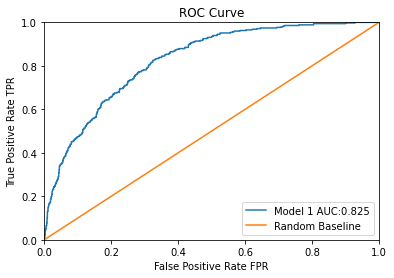

True positives (Actual = 1 and predicted = 1):  163
True negatives (Actual = 0 and predicted = 0):  955
False positives (Actual = 0 and predicted = 1):  104
False negatives (Actual = 1 and predicted = 0):  185
Accuracy (tp + tn)/(tp + tn + fn + fp):  0.7945984363894811
Precision tp/(tp + fp):  0.6104868913857678
Sensitivity tp/(tp + fn):  0.46839080459770116


In [101]:

X21 = X[['TENURE','MONTHLYCHARGES']]
y21 = X['NUMCHURN']
X21_train, X21_test, y21_train, y21_test = train_test_split(X21,y21, test_size=0.2)

X21_train = sm.add_constant(X21_train)
X21_test = sm.add_constant(X21_test)
model_2 = sm.Logit(y21_train, X21_train).fit()
print(model_2.summary())
pred_2 = model_2.predict(X21_test)

fpr_2, tpr_2, _ = roc_curve(y21_test, pred_2)
auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr_2, tpr_2)
plt.plot([0,1], [0,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Model 1 AUC:' + str(round(auc_2, 3)), 'Random Baseline'], loc='lower right')
plt.title('ROC Curve' )
plt.xlabel('False Positive Rate FPR' )
plt.ylabel('True Positive Rate TPR')
plt.show() 

pred = np.array(model_2.predict(X21_test) > 0.5, dtype=float)
actual = np.array(y21_test)

tp = np.sum(np.logical_and(actual==1, pred==1))
tn = np.sum(np.logical_and(actual==0, pred==0))
fp = np.sum(np.logical_and(actual==0, pred==1))
fn = np.sum(np.logical_and(actual==1, pred==0))

print("True positives (Actual = 1 and predicted = 1): ", tp)
print("True negatives (Actual = 0 and predicted = 0): ", tn)
print("False positives (Actual = 0 and predicted = 1): ", fp)
print("False negatives (Actual = 1 and predicted = 0): ", fn)

print("Accuracy (tp + tn)/(tp + tn + fn + fp): ", (tp + tn)/(tp + tn + fn + fp))
print("Precision tp/(tp + fp): ", tp/(tp + fp))
print("Sensitivity tp/(tp + fn): ", tp/(tp + fn))
